In [1]:
import torch 
from torch import nn
from d2l import torch as d2l


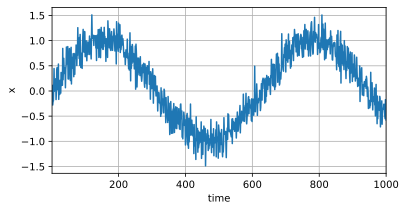

In [2]:
T = 1000
time =torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))


In [5]:
tau = 4
features = torch.zeros((T-tau, tau))
for i in range(tau):
    features[:, i] = x[i: i + T - tau
                       ]
labels = x[tau:].reshape((-1, 1))
batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[: n_train], labels[ :n_train]), batch_size, True)


In [8]:
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weight)
    return net
loss = nn.MSELoss(reduction='none')

In [9]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch+1},'
              f'loss  {d2l.evaluate_loss(net, train_iter, loss)}' )
        

net = get_net()

train(net, train_iter, loss, 5, 0.01)

epoch 1,loss  0.060718117753664654
epoch 2,loss  0.05439769079287847
epoch 3,loss  0.05111831237872442
epoch 4,loss  0.0499244499206543
epoch 5,loss  0.04989562263091405


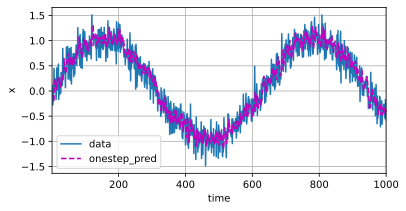

In [11]:
onestep_preds = net(features)

d2l.plot([time, time[tau:]], [x.detach().numpy(), onestep_preds.detach().numpy()], 
         'time', 'x', legend=['data', 'onestep_pred'], xlim=[1, 1000], figsize=(6, 3))


In [12]:
multistep_preds = torch.zeros(T)
multistep_preds[: tau + n_train] = x[: tau + n_train]
for i in range(tau + n_train, T):
    multistep_preds[i] = net(multistep_preds[i-tau:i].reshape((1, -1)))

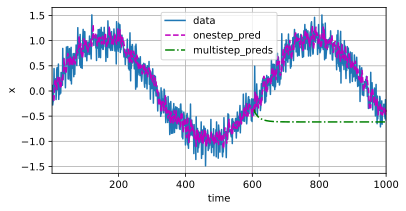

In [14]:

d2l.plot([time, time[tau:], time[n_train + tau:]],
          [x.detach().numpy(), onestep_preds.detach().numpy(),
            multistep_preds[n_train+tau:].detach().numpy()], 
         'time', 'x', legend=['data', 'onestep_pred', 'multistep_preds'], 
         xlim=[1, 1000], figsize=(6, 3))

In [15]:
max_step = 64


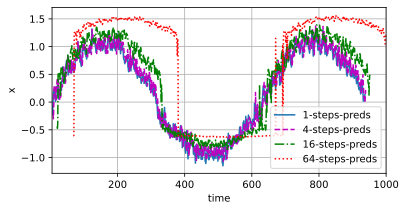

In [18]:
features = torch.zeros((T-tau-max_step+1, tau + max_step))

for i in range(4):
    features[:, i] = x[i : T-tau-max_step+1+i]

for i in range(tau, tau+max_step):
    features[:, i] = net(features[:, i-tau:i]).reshape(-1)

steps = (1, 4, 16, 64)

d2l.plot([time[tau+i-1: T-max_step+i] for i in steps], [features[:, tau+i-1].detach().numpy() for i in steps ],
         'time', 'x', legend=[f'{i}-steps-preds' for i in steps], xlim=[5,1000],figsize=(6, 3))